# DAY 8: Africa

https://x.com/tjukanov/status/1708562689960648930?s=20

## Imports

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import geopandas as gpd
import shapely.ops as so  # geometric operations e.g. merging, transforming, etc.
from shapely.geometry import Point, Polygon

In [53]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Get the data

In [54]:
gdf = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres")
)

gdf

C:\Users\pjastrz1\AppData\Local\Temp\ipykernel_24236\68497823.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres")


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [55]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Africa data only and calculations

In [56]:
gdf_africa = (
    gdf
    .loc[gdf["continent"] == "Africa"]
    .copy(deep=True)
    .reset_index(drop=True)
)

gdf_africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
1,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
2,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
3,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
4,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
5,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
6,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
7,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
8,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
9,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [57]:
len(gdf_africa)

51

### Get the shape of the Africa

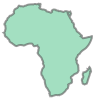

In [58]:
africa_shape = so.unary_union(gdf_africa.geometry)
africa_shape

In [59]:
list(africa_shape.geoms)

[<POLYGON ((-11.439 6.786, -11.708 6.86, -12.428 7.263, -12.949 7.799, -13.12...>,
 <POLYGON ((50.2 -16, 49.861 -15.414, 49.673 -15.71, 49.863 -16.451, 49.775 -...>]

In [60]:
africa_shape = list(africa_shape.geoms)
africa_shape

[<POLYGON ((-11.439 6.786, -11.708 6.86, -12.428 7.263, -12.949 7.799, -13.12...>,
 <POLYGON ((50.2 -16, 49.861 -15.414, 49.673 -15.71, 49.863 -16.451, 49.775 -...>]

### Check if country has a sea access

In [61]:
temp = []
for row in gdf_africa.iterrows():
    if row[1].geometry.intersects(africa_shape[0].boundary):
        temp.append(True)
    else:
        # Madagascar
        temp.append(row[1].geometry.intersects(africa_shape[1].boundary))

temp

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False]

In [62]:
gdf_africa["sea_access"] = temp
gdf_africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sea_access
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",True
1,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",True
2,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",True
3,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",True
4,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",True
5,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",True
6,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...",False
7,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",True
8,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257...",False
9,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",False


### Check nr of neighbours

In [63]:
temp = []
for row in gdf_africa.iterrows():
    counter = 0
    for country in gdf_africa.geometry:
        if row[1].geometry.intersects(country):
            counter += 1
    
    temp.append(counter-1)

temp

[8,
 3,
 9,
 3,
 5,
 7,
 5,
 6,
 1,
 4,
 4,
 4,
 5,
 7,
 4,
 4,
 8,
 3,
 7,
 3,
 3,
 5,
 6,
 2,
 3,
 2,
 6,
 6,
 5,
 3,
 2,
 8,
 3,
 6,
 2,
 4,
 3,
 0,
 1,
 2,
 7,
 3,
 2,
 2,
 6,
 7,
 3,
 3,
 5,
 4,
 6]

In [64]:
gdf_africa["nr_of_neighbours"] = temp
gdf_africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sea_access,nr_of_neighbours
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",True,8
1,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",True,3
2,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",True,9
3,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",True,3
4,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",True,5
5,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",True,7
6,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...",False,5
7,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",True,6
8,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257...",False,1
9,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",False,4


### Geometrical center of the country

In [65]:
temp = []
temp_poly = []
for row in gdf_africa.iterrows():
    for signs in [(-1, -1), (1, -1), (1, 1), (-1, 1)]: # (x_sign, y_sign):
        center = row[1].geometry.centroid
        half_side = np.sqrt(row[1].geometry.area)*0.5
        temp.append(
            Point(
                center.x + signs[0]*half_side,
                center.y + signs[1]*half_side,
            )
        )
    
    temp_poly.append(Polygon(temp))
    temp = []

temp_poly


[<POLYGON ((30.385 -10.625, 39.121 -10.625, 39.121 -1.89, 30.385 -1.89, 30.38...>,
 <POLYGON ((-13.604 22.825, -10.671 22.825, -10.671 25.758, -13.604 25.758, -...>,
 <POLYGON ((16.7 -9.734, 30.466 -9.734, 30.466 4.033, 16.7 4.033, 16.7 -9.734))>,
 <POLYGON ((42.583 1.609, 48.87 1.609, 48.87 7.896, 42.583 7.896, 42.583 1.609))>,
 <POLYGON ((34.326 -2.869, 41.257 -2.869, 41.257 4.061, 34.326 4.061, 34.326 ...>,
 <POLYGON ((23.609 9.737, 36.116 9.737, 36.116 22.244, 23.609 22.244, 23.609 ...>,
 <POLYGON ((13.405 10.153, 23.757 10.153, 23.757 20.505, 13.405 20.505, 13.40...>,
 <POLYGON ((19.74 -34.255, 30.356 -34.255, 30.356 -23.639, 19.74 -23.639, 19....>,
 <POLYGON ((27.37 -30.426, 28.97 -30.426, 28.97 -28.825, 27.37 -28.825, 27.37...>,
 <POLYGON ((26.948 -21.748, 32.629 -21.748, 32.629 -16.066, 26.948 -16.066, 2...>,
 <POLYGON ((20.173 -25.7, 27.373 -25.7, 27.373 -18.5, 20.173 -18.5, 20.173 -2...>,
 <POLYGON ((12.904 -26.352, 21.409 -26.352, 21.409 -17.847, 12.904 -17.847, 1...>,
 <POL

In [66]:
gdf_africa_squares = gpd.GeoDataFrame(
    crs=gdf_africa.crs,
    geometry=temp_poly
)

gdf_africa_squares

,geometry
0,"POLYGON ((30.38544 -10.62528, 39.12054 -10.625..."
1,"POLYGON ((-13.60446 22.82455, -10.67120 22.824..."
2,"POLYGON ((16.69973 -9.73350, 30.46618 -9.73350..."
3,"POLYGON ((42.58313 1.60878, 48.87027 1.60878, ..."
4,"POLYGON ((34.32626 -2.86933, 41.25685 -2.86933..."
5,"POLYGON ((23.60871 9.73670, 36.11649 9.73670, ..."
6,"POLYGON ((13.40525 10.15278, 23.75741 10.15278..."
7,"POLYGON ((19.73956 -34.25548, 30.35646 -34.255..."
8,"POLYGON ((27.36981 -30.42558, 28.97040 -30.425..."
9,"POLYGON ((26.94776 -21.74778, 32.62934 -21.747..."


## Plot

In [67]:
mosaic = "ABC"

rcParams.update(
    {
        "font.size": 14,
    }
)

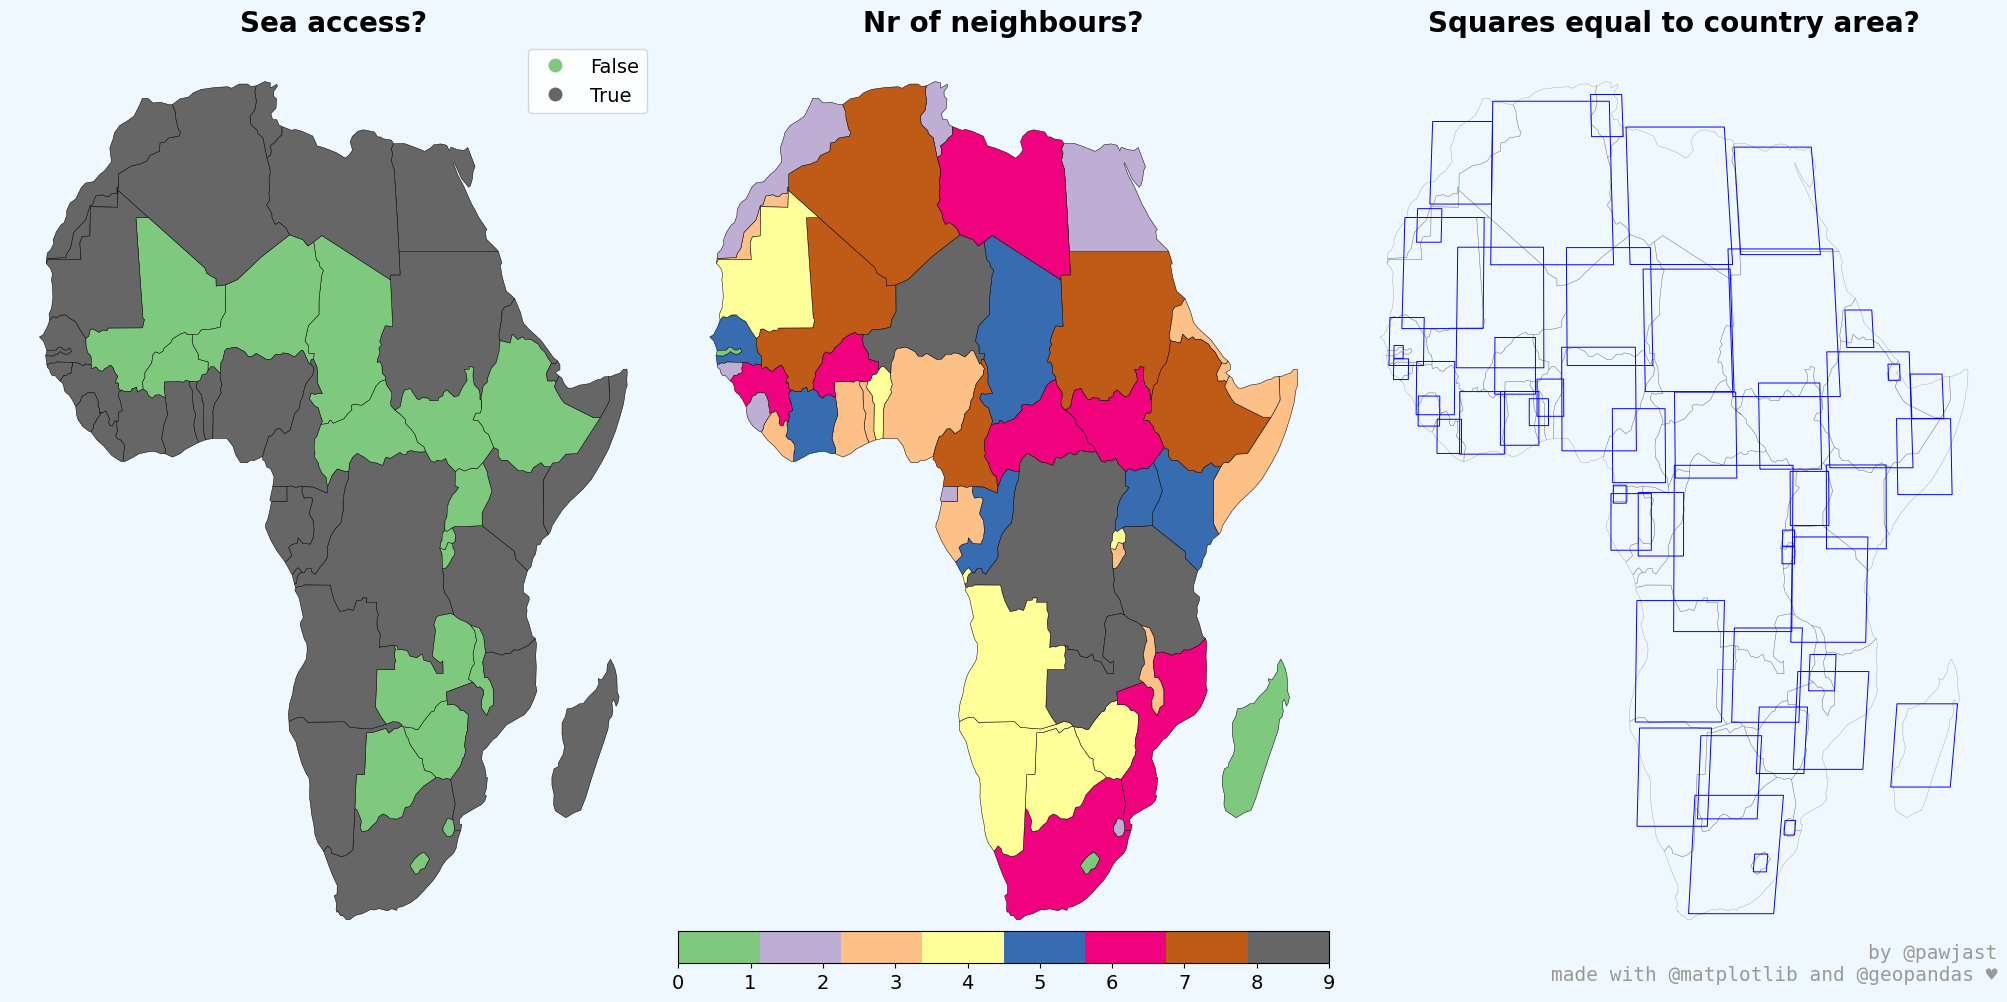

In [68]:
fig, axs = plt.subplot_mosaic(
    mosaic=mosaic,
    figsize=(20, 10),
    layout="constrained",
    facecolor="aliceblue",
    sharex=True,
    sharey=True
)

# Plot: sea access
axs["A"].set_title(
    "Sea access?",
    fontsize=20,
    weight="bold"
)
gdf_africa.to_crs('ESRI:54012').plot(
    ax=axs["A"],
    column="sea_access",
    cmap="Accent",
    edgecolor="black",
    lw=.35,
    legend=True
)
axs["A"].set_axis_off()

# Plot: nr of neighbours
axs["B"].set_title(
    "Nr of neighbours?",
    fontsize=20,
    weight="bold"
)
gdf_africa.to_crs('ESRI:54012').plot(
    ax=axs["B"],
    column="nr_of_neighbours",
    cmap="Accent",
    edgecolor="black",
    lw=.35,
    legend=True,
    legend_kwds={
        "orientation": "horizontal",
        "location": "bottom",
        "pad": -0.05
    }
)
axs["B"].set_axis_off()

# Plot: Africa as squares
axs["C"].set_title(
    "Squares equal to country area?",
    fontsize=20,
    weight="bold"
)
gdf_africa.to_crs('ESRI:54012').boundary.plot(
    ax=axs["C"],
    edgecolor="black",
    lw=.35,
    alpha=0.3
)
gdf_africa_squares.to_crs('ESRI:54012').boundary.plot(
    ax=axs["C"],
    lw=.7,
    edgecolor="blue"
)
axs["C"].set_axis_off()

axs["C"].text(
    1, 0.-0.025,
    "by @pawjast\nmade with @matplotlib and @geopandas \u2665",
    transform =axs["C"].transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    family="monospace",
    weight="medium"
);

plt.savefig(
    fname="pawjast.png",
    # facecolor="white",
    format="png",
    dpi=125,
    metadata=metadata_dict
);

## End